In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import openpyxl

In [ ]:
import os

In [ ]:
df = pd.read_excel("./파이널프로젝트_RAW_210329_210926.xlsx")

In [ ]:
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [ ]:
df['course_title'].unique() # 종류가 많고 미사여구로 이루어져 있어 분석에 용이하지 않음

array(['올인원 패키지 : 알고리즘 기술면접 완전 정복', '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집',
       '시크릿코드 : 프론트엔드 실무 완성편', ..., '(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처',
       '(B2B) 디캠프 패밀리사 온라인 구독 올 플랜 (9월)',
       '(B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처'], dtype=object)

In [ ]:
df['coupon_title'].unique()

array([nan, '[10% 할인] 시크릿코드 실무 완성편', '[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰',
       '[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰', '[웰컴쿠폰] 온라인 완주반 5만원 할인 쿠폰',
       '?즉시할인 쿠폰 코드 : spring5% ?', '[럭키룰렛] 올인원패키지',
       '[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰', '타이포그래피 기수강생 할인 쿠폰',
       '[할인쿠폰] 파이낸스 카테고리 올인원 패키지 30% 할인 (금융 아카데미 제외)', '[럭키룰렛] 완주반',
       '[10% 할인] 프론트엔드 실무 완성편',
       '한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)',
       '수강생 50만명 돌파 기념 감사제 쿠폰', '올인원 패키지 : 타이포그래피와 편집디자인 강의 수강권',
       '[무료수강권] 강의 검수용_이호상 PM님', '패캐머_온라인 쿠폰 !',
       '[무료수강권] 파이낸스 카테고리 올인원 패키지_대체투자 자산운용 실무 영상 오픈 일정 변경',
       '한 번에 끝내는 반복 업무 자동화 초격차 패키지 사용 가능 쿠폰', 'crm 검수용 쿠폰 aop',
       '[쿠폰재발급]수강생 50만명 돌파 기념 감사제 쿠폰', '[재발급] 페이백 쿠폰',
       '[무료수강권] 강의검수용_강사님 쿠폰_박혜린 강사님', '신해동 발행 쿠폰', '[무료수강권] 강사님 제공용 RED',
       '[무료수강권] 강사님 제공용', '[할인쿠폰] 영상/디자인 카테고리 올인원 패키지 5만원 할인_영상 오픈 일정 변경',
       '[무료수강권] 내부직원 검수용 RED',
       '[무료수강권] 올인원 패키지 : 인스타를 성장시킨 50명의 성공 방정식 강의검수용_강사님 쿠폰', '올인원패키지',
       '[무료수강권] 내부직원 강의 검수용',
       '[무료수강권] 권오상 회계사

In [ ]:
df['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND', 'TRANSACTION'], dtype=object)

In [ ]:
df.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,1.054190e+05,105416.000000,100212.000000,1.054190e+05,3.181700e+04,1.042910e+05,1.042910e+05
mean,1.147054e+06,417248.252742,203868.586327,1.464814e+05,4.972172e+04,1.610808e+05,1.575551e+05
std,1.125898e+05,206414.496648,1534.583331,7.195061e+05,5.624467e+04,3.955298e+05,3.898133e+05
min,5.679930e+05,16.000000,2516.000000,-4.144074e+06,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.048940e+06,256401.000000,203100.000000,8.350000e+04,2.000000e+04,1.090000e+05,1.090000e+05
50%,1.135186e+06,501046.000000,203787.000000,1.175000e+05,2.100000e+04,1.320000e+05,1.320000e+05
75%,1.240472e+06,566595.000000,204775.000000,1.590000e+05,6.915000e+04,1.710000e+05,1.710000e+05
max,1.381657e+06,672308.000000,207742.000000,1.134000e+08,2.000000e+06,9.094000e+07,9.094000e+07


In [ ]:
check = df[df['coupon_title'].notna()]
cp = check[(check['type'] == 'PAYMENT') & (check['state'] == 'COMPLETED')]

In [ ]:
ref = df.groupby('type').get_group('REFUND') # 환불된 강의만 dataframe 따로 구성

Text(0.5, 1.0, '환불')

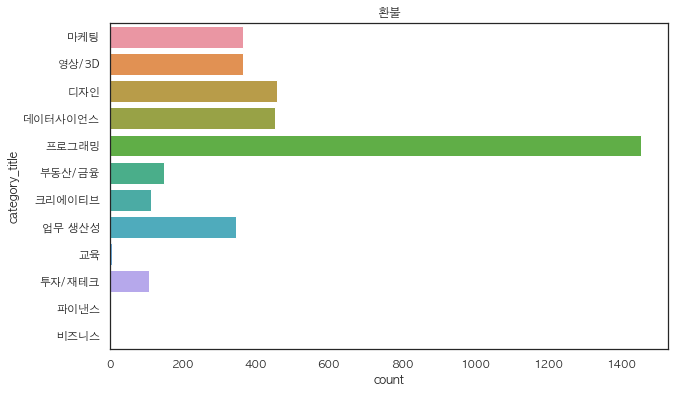

In [ ]:
plt.figure(figsize=(10,6))
plt.rc("font", family="AppleGothic")
sns.countplot(data=ref, y='category_title')
sns.set_style('white')
plt.title('환불')

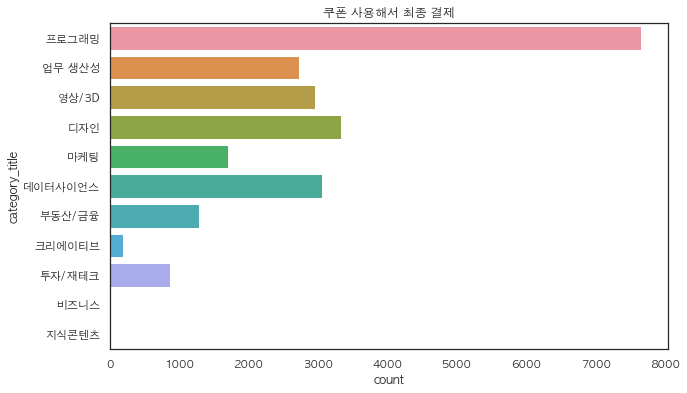

In [ ]:
plt.figure(figsize=(10,6))
plt.rc("font", family="AppleGothic")
sns.countplot(data=cp, y='category_title')
sns.set_style('white')
plt.title('쿠폰 사용해서 최종 결제')
plt.show()

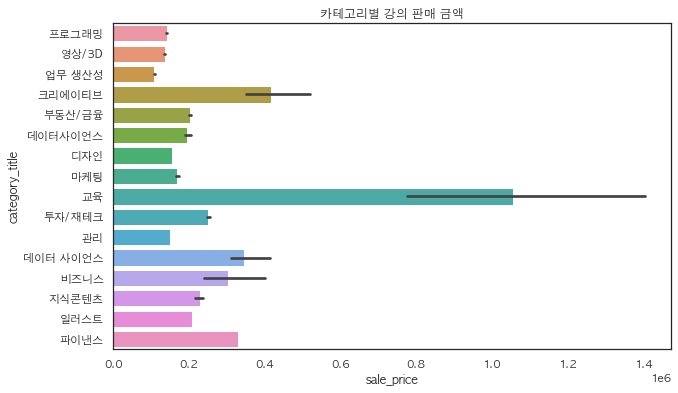

In [ ]:
plt.figure(figsize=(10,6))
plt.rc("font", family="AppleGothic")
sns.barplot(data=df, x='sale_price',
             y='category_title')
sns.set_style('white')
plt.xticks()
plt.title('카테고리별 강의 판매 금액')
plt.show()